---
title: "Clustering"
code-fold: True
---

# Introduction

In my project, I'm delving into my dataset gathered from Reddit, which comprises scraped titles from posts on the Reddit WallStreetBets (WSB) subreddit which are related to the topic Bed Bath and Beyond. My goal with the clustering analysis is to sift through these titles for patterns and themes that reveal the collective mood and recurring topics of discussion. I want to see which sentiments dominate the conversation and understand the nature of the discourse—whether it’s generally bullish or bearish, and if it's suggesting specific trading actions. This endeavor is not just about mapping out the frequency of mentions but also about gauging the sway this online community has over market sentiment and stock movements.

By applying clustering to the post titles, I'm looking to categorize them into clusters that might correspond to different sentiments, investment advice, or highlight the most talked-about 'meme stocks'. I aim to ascertain the reliability of the sentiments expressed and consider the feasibility of crafting an investment strategy based on the collective insights of the WSB community. Additionally, I'm curious to compare the activity before and after the Bed Bath & Beyond incident to determine if that was a standalone event or a magnification of a pre-existing pattern within the subreddit's interactions.

# Theory
**K-Means Clustering**

K-Means clustering is like organizing a university's clubs fair. We want to set up booths so that students with similar interests gather around them. We decide on a number of booths (say, for music, sports, tech, literature, and volunteering). We place a sign for each in the middle of the field and watch students flock to the one they're interested in. After the initial rush, we see that the tech group is crowded while the literature group is sparse. So, we move the signs to the actual centers of the student clusters. We repeat this process, adjusting the locations of the signs until the groups are well sorted, and the signs don't need to be moved anymore because they accurately represent the center of student interests.

To figure out the best number of booths, we might use the "elbow method." Imagine plotting the number of booths against how well they represent student interests. There's a point where adding more booths doesn't significantly improve the grouping - that's our "elbow," the sweet spot for the number of clusters.

**DBSCAN**

DBSCAN is akin to observing student interactions during a free period in a common area. Instead of predetermined booths, we watch natural groups form. DBSCAN looks for where students are densely gathered, considering a group as a cluster if there are enough students within a conversation circle. Those sitting alone far from groups, like students studying solo, are left as outliers and not forced into a cluster. 

This method shines when you don't know how many groups there might be and when groups vary in size. DBSCAN doesn't require a method like the "elbow," as it determines clusters based on student density in different areas, recognizing natural gatherings.

**Hierarchical Clustering**

Hierarchical clustering is comparable to creating a network of student mentorship within a large campus. Each student starts as their own entity. Slowly, we pair up students with the most in common into buddy systems. These pairs then join with others to form groups, and the groups join to form larger communities. This continues until there's a large hierarchy representing the entire student body. We can then decide at what level we establish divisions, creating separate communities for different academic or extracurricular interests.

To decide where to draw these divisions, we might use a silhouette score. This score helps us ensure that each student within a group is matched well with their peers, and distinct from students in other groups, giving a sense of belonging within the community while maintaining diversity.

In a university setting, each clustering method offers a distinct approach to fostering student communities — whether it's through structured organization, recognizing organic groupings, or building connections in a stepwise fashion.

# Kmeans and DBSCAN

In [58]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN, MeanShift, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict

# Reading in CSV file and Performing PCA, DBSCAN and KMEANS on the cleaned data

- Since the data has already been cleaned, we can directly apply PCA to convert the text data into normalized vectors to pass through DBSCAN and KMEANS. In this project, I have used TD-IDF to convert the text data into normalized vectors.

In [59]:
df = pd.read_csv('../data/CleanedData.csv')


vectorizer = TfidfVectorizer(stop_words='english')
text_features = vectorizer.fit_transform(df['title'])

# No need to scale the features as TF-IDF produces normalized vectors
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(text_features.toarray())

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(text_features)


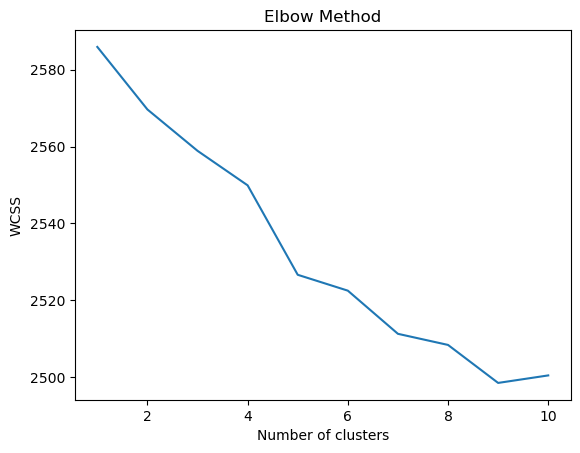

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# Elbow Method
wcss = []
for i in range(1, 11):  # Assuming we test 1-10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(text_features)
    wcss.append(kmeans.inertia_)

# Plotting the results of the elbow method
plt.figure()
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



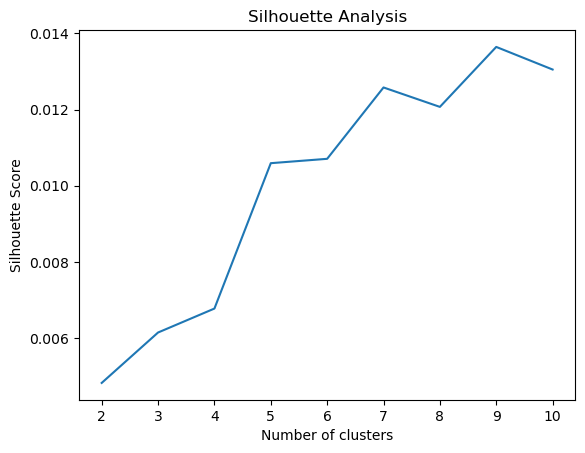

In [61]:
# Silhouette Analysis
silhouette_scores = []
for i in range(2, 11): 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(text_features, kmeans.labels_))

# Plotting the silhouette scores
plt.figure()
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [62]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans_labels = kmeans.fit_predict(reduced_features)

dbscan_labels, kmeans_labels

/Users/dheeraj/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([-1, -1, -1, ..., -1, -1, -1]),
 array([0, 0, 4, ..., 4, 4, 4], dtype=int32))

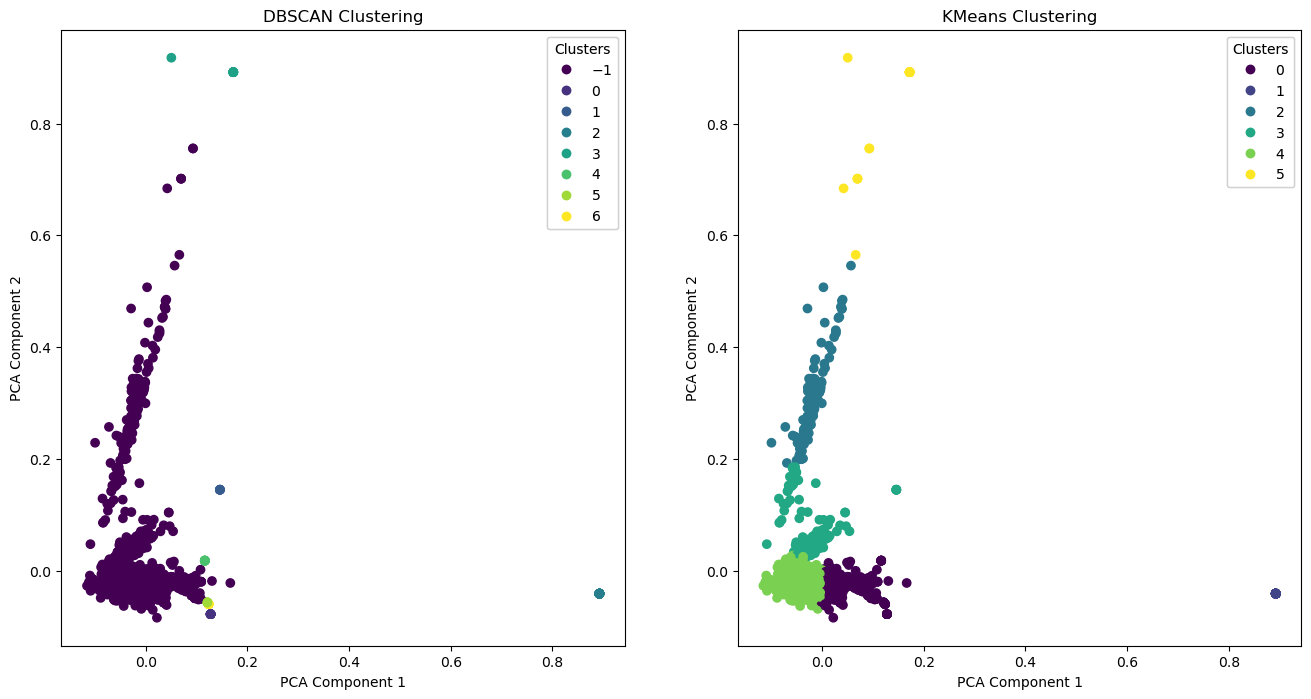

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# DBSCAN
scatter = ax[0].scatter(reduced_features[:, 0], reduced_features[:, 1], c=dbscan_labels, cmap='viridis', marker='o')
ax[0].set_title('DBSCAN Clustering')
ax[0].set_xlabel('PCA Component 1')
ax[0].set_ylabel('PCA Component 2')
legend1 = ax[0].legend(*scatter.legend_elements(), title="Clusters")
ax[0].add_artist(legend1)

# KMeans
scatter = ax[1].scatter(reduced_features[:, 0], reduced_features[:, 1], c=kmeans_labels, cmap='viridis', marker='o')
ax[1].set_title('KMeans Clustering')
ax[1].set_xlabel('PCA Component 1')
ax[1].set_ylabel('PCA Component 2')
legend2 = ax[1].legend(*scatter.legend_elements(), title="Clusters")
ax[1].add_artist(legend2)

plt.show()

# DBSCAN Clustering Results:
- The data contains several dense regions with varying densities, suggesting multiple subgroups or patterns within the dataset.
- The presence of noise (points labeled with "-1") indicates outliers in the data that do not fit well within any cluster. This can be crucial for anomaly detection or to identify unique instances in the dataset.
- The clusters have different shapes and sizes, which could imply that the underlying phenomena or behaviors that generated the data are complex and non-uniform.
- The ability of DBSCAN to find these arbitrary shaped clusters could be essential for applications where the cluster shape is irregular, such as geographic data clustering or identifying regions of interest in images.
# KMeans Clustering Results:
- There are three distinct groups in the data, which might represent three different categories or types within the dataset.
- The tightness of the clusters could suggest that the data points within each cluster are similar to each other, which can be useful for segmenting the data into clear, distinct groups.


## Kmeans to generate wordcloud for data in each cluster

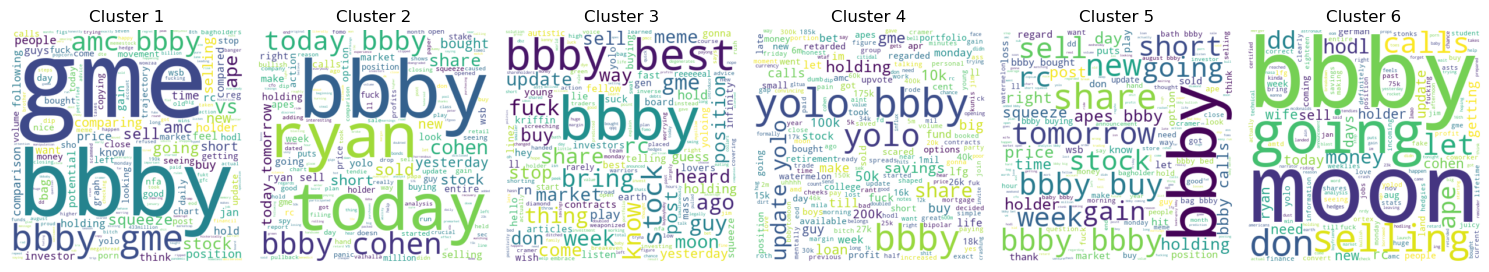

In [64]:
n_clusters = 6
model = KMeans(n_clusters=n_clusters, random_state=42)
model.fit(text_features)

# Extracting features and words for word clouds
features = vectorizer.get_feature_names_out()
clusters = model.labels_

# Creating a dictionary to hold words for each cluster
clustered_words = defaultdict(list)
for i, label in enumerate(clusters):
    for feature, value in zip(features, text_features.toarray()[i]):
        if value > 0:  # adding only words present in the document
            clustered_words[label].append(feature)

# Generating word clouds for each cluster
fig, axes = plt.subplots(1, n_clusters, figsize=(15, 5))
for i in range(n_clusters):
    wordcloud = WordCloud(width=400, height=400, background_color='white').generate(' '.join(clustered_words[i]))
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(f'Cluster {i+1}')

plt.tight_layout()
plt.show()

# Hierarchical Clustering

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import squareform

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['title'])

cosine_matrix = cosine_similarity(X)

# Compute the cosine similarity matrix
cosine_matrix_dense = cosine_matrix.astype(float)

# Perform hierarchical clustering using the dense cosine similarity matrix
Z = linkage(cosine_matrix_dense, method='average', metric='euclidean')



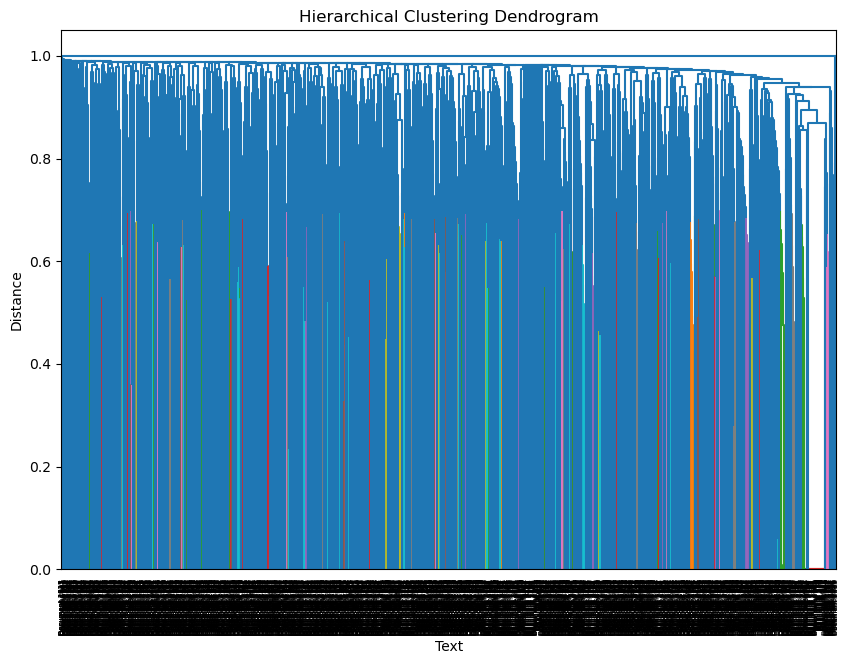

In [66]:
# Compute the cosine dissimilarity matrix (1 - similarity)
cosine_dissimilarity_matrix = 1 - cosine_matrix

# Ensure the dissimilarity matrix is non-negative
cosine_dissimilarity_matrix[cosine_dissimilarity_matrix < 0] = 0

# Convert the cosine dissimilarity matrix to a condensed form
condensed_matrix = squareform(cosine_dissimilarity_matrix, checks=False)

# Perform hierarchical clustering using the condensed cosine dissimilarity matrix
Z = linkage(condensed_matrix, method='average')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=[f"Document {i+1}" for i in range(len(df))])
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Text')
plt.ylabel('Distance')
plt.show()



# Comparision and Report:


1. **DBSCAN Clustering**:
   - In the visualization, each point represents a data item, and the coloring corresponds to different clusters identified by DBSCAN. The cluster labeled as '-1' represents noise — these are points that didn't fit well into any cluster.

2. **KMeans Clustering**:
   - KMeans clustering, a centroid-based clustering algorithm. This method partitions the data into k number of clusters, each represented by the mean of the data points in the cluster.
   - The visualization indicates that 6 clusters have been found. The different colors correspond to the different clusters, with the KMeans algorithm aiming to minimize the variance within each cluster.

3. **Word Clouds for Clusters**:
   - The word clouds represent the most frequent terms within each cluster identified by a clustering method.
   - Each word's size is indicative of its frequency within the cluster's documents, giving a visual representation of the most characteristic themes or topics within each cluster.

4. **Hierarchical Clustering Dendrogram**:
   - The dendrogram illustrates the result of hierarchical clustering, which creates clusters by building a hierarchy of clusters based on their distance or dissimilarity.
   - The vertical axis represents the distance or dissimilarity between clusters, with the horizontal lines representing the merging of clusters. The colors may indicate different clusters based on a specific cut-off value for the distance.

**Comparison and Insights**:

- **DBSCAN vs. KMeans**: DBSCAN seems to have identified a more complex structure, with several clusters and noise, which can be helpful if the data has an irregular shape. KMeans, on the other hand, assumes roughly spherical clusters and partitions the space into Voronoi cells, which may not always align with the true distribution of data.
  
- **DBSCAN Insights**: The DBSCAN clusters show a varied number of points, indicating a diverse density within the data. The presence of noise points could suggest outliers or unique documents.

- **KMeans Insights**: The KMeans clusters seem to have a more uniform distribution, which might not capture the complexity of the data as effectively as DBSCAN if the true clusters are not spherical or have varying densities.

- **Hierarchical Clustering**: The dendrogram provides a detailed view of how individual data points are merged into clusters, offering a visual insight into the data's structure at different levels of granularity. It can be particularly useful for understanding nested relationships between clusters.

- **Word Clouds**: They offer qualitative insights into the content of each cluster, which can be particularly useful for understanding the topics within text data. For example, if cluster 1 contains words like "sell", "buy", and "stock", it might represent discussions around trading.

**Optimal Cluster Predictions**:

- The word clouds can be compared to the clusters identified by DBSCAN and KMeans to see if the words from each word cloud predominantly belong to the clusters identified by the respective algorithms.
- Any discrepancies between clusters and the word clouds could indicate differences in how algorithms interpret the underlying data structure or the sensitivity to the algorithms' parameters.

## **Final Thoughts and Conclusion**:

- The effectiveness and preference of a clustering method can be context-dependent. If the data has outliers or non-spherical clusters, DBSCAN may perform better.
- KMeans is often preferred for its simplicity and speed, especially on large datasets where the number of clusters is known or can be estimated.
- Hierarchical clustering provides a comprehensive view of potential clusterings based on distance and can be ideal for exploratory data analysis when the number of clusters is not known.
- The above dendogram represents that the text data is too large to fit into proper clusters. This implies that the text data maybe too complex or has too many dimensions to cluster correctly. There is a lot of overlap between the clusters and the text data which is probably due to the fact that this method is not optimal for text data.




### References:

    [1][https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/#:~:text=DBSCAN%2Density%2DBased%20Spatial%20Clustering,and%20classifying%20outliers%20as%20noise.]

    [2][https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html]

    [3][https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html]

    [4][https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/]

    [5][https://en.wikipedia.org/wiki/Hierarchical_clustering]